<a href="https://colab.research.google.com/github/missmisspa/bda/blob/main/Big_Data_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


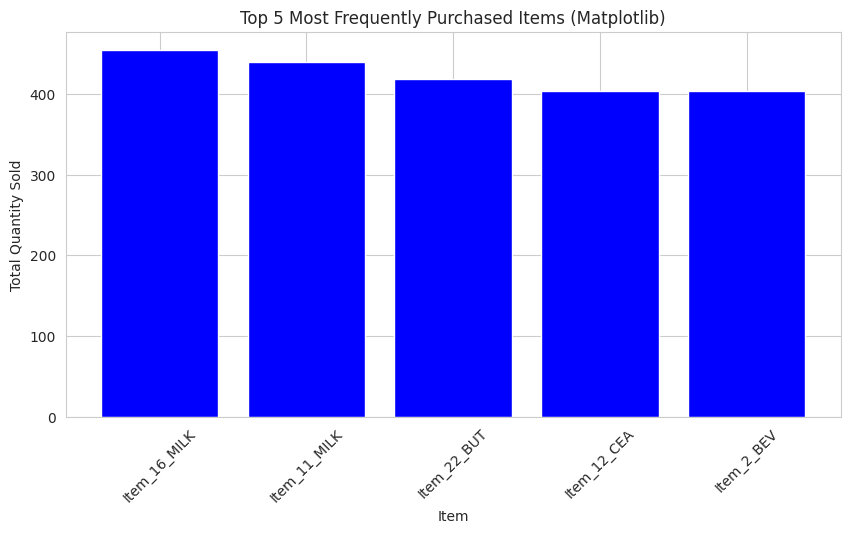

<ipython-input-1-914ba285f45e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Item", y="Quantity", data=top_items, palette="Blues_d")


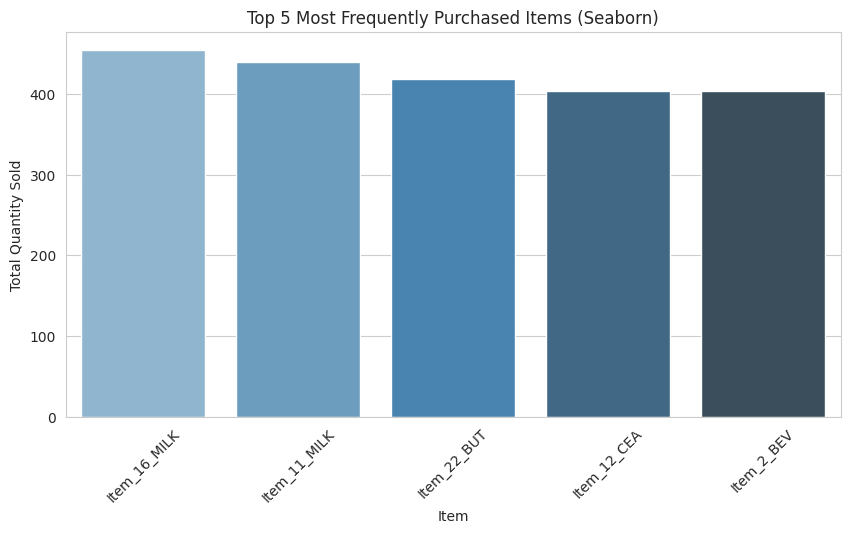

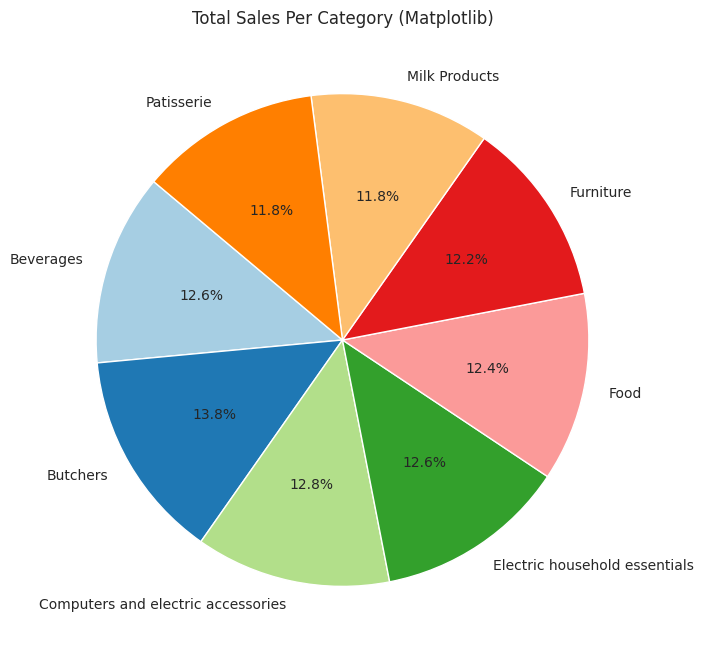

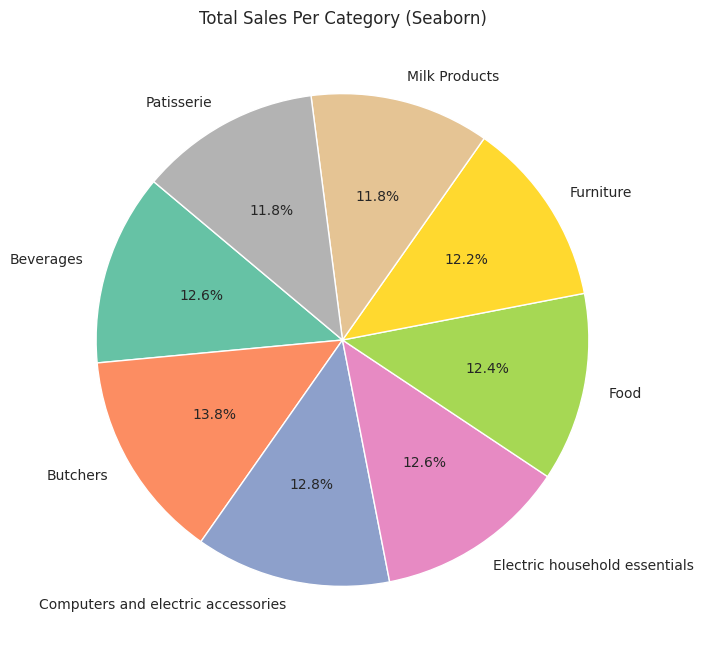

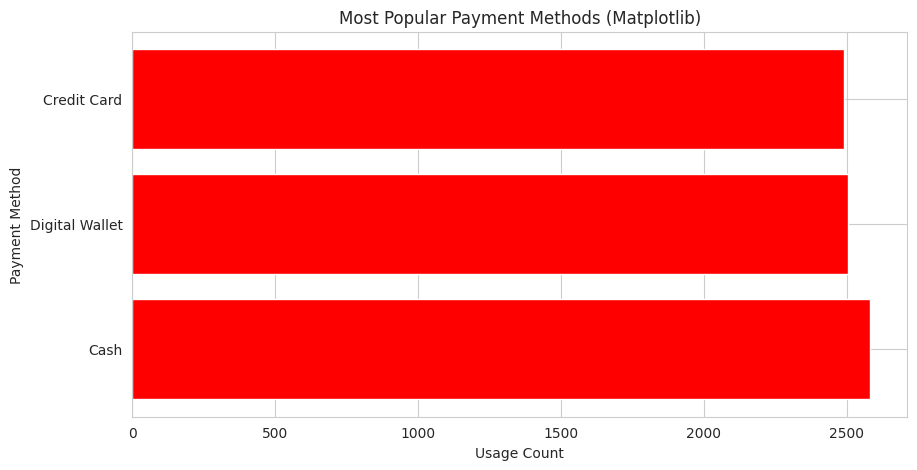

<ipython-input-1-914ba285f45e>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Usage Count", y="Payment Method", data=payment_methods, palette="coolwarm")


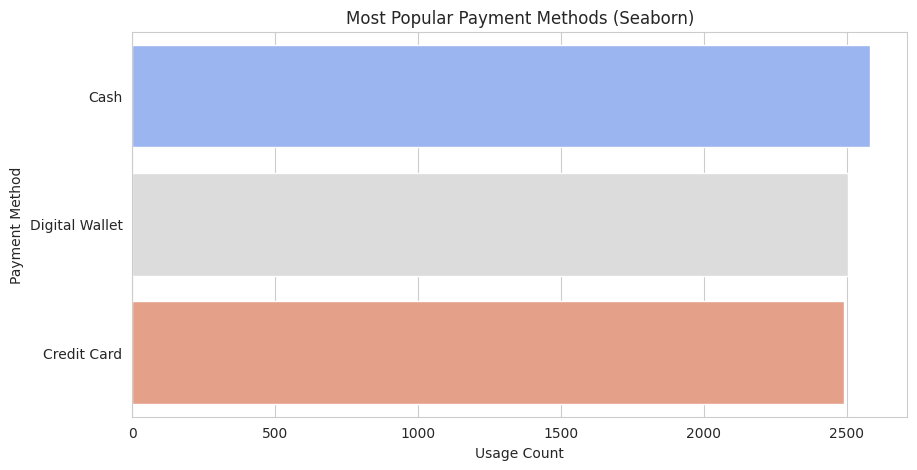

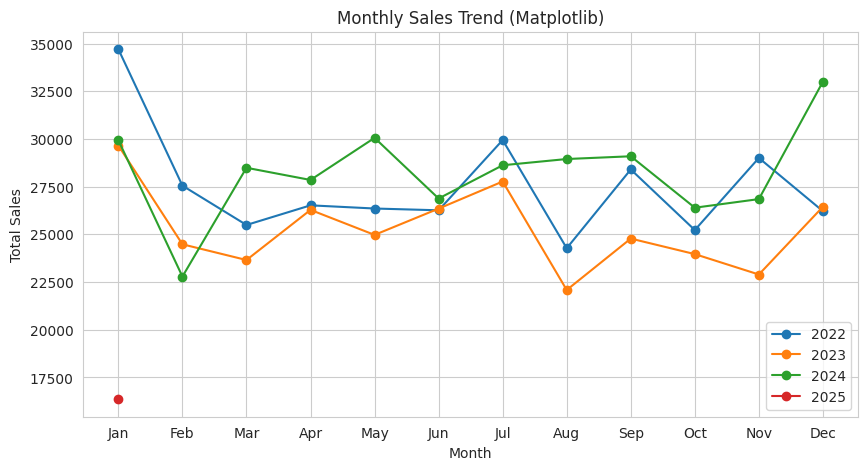

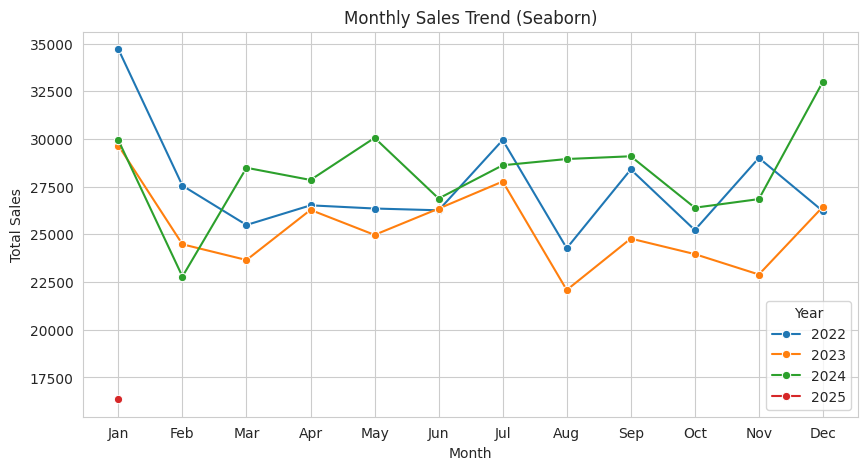

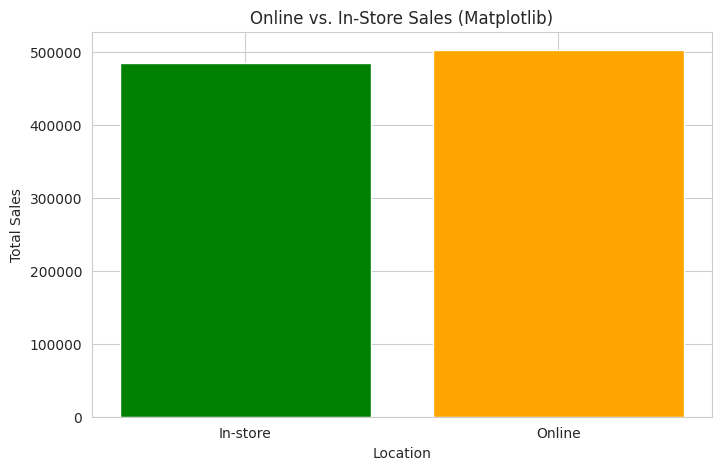

<ipython-input-1-914ba285f45e>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Location", y="Total Spent", data=location_sales, palette="pastel")


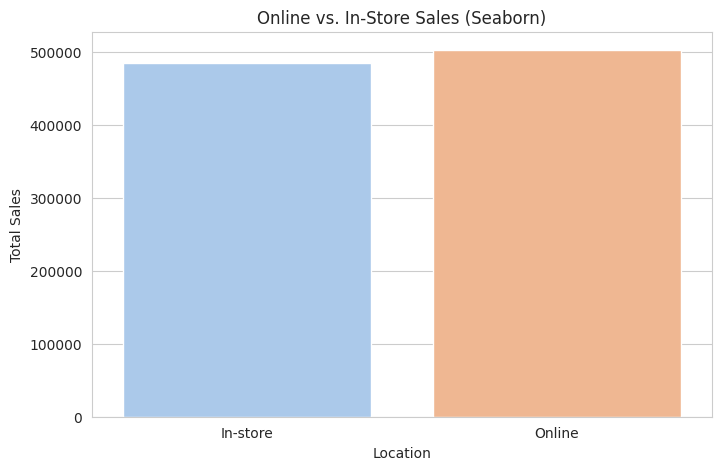

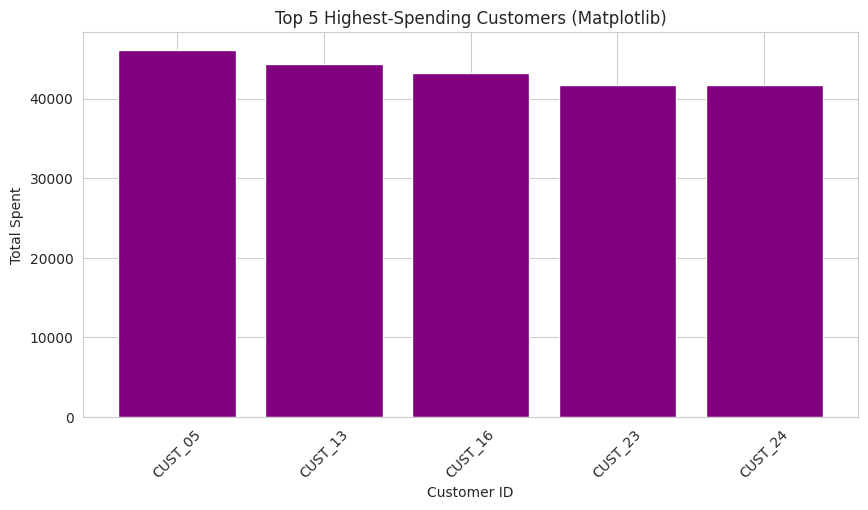

<ipython-input-1-914ba285f45e>:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Customer ID", y="Total Spent", data=top_customers, palette="coolwarm")


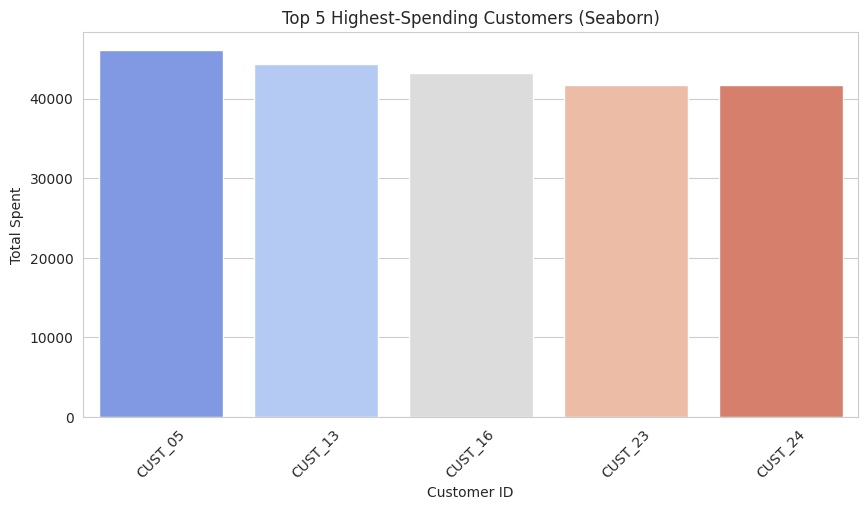

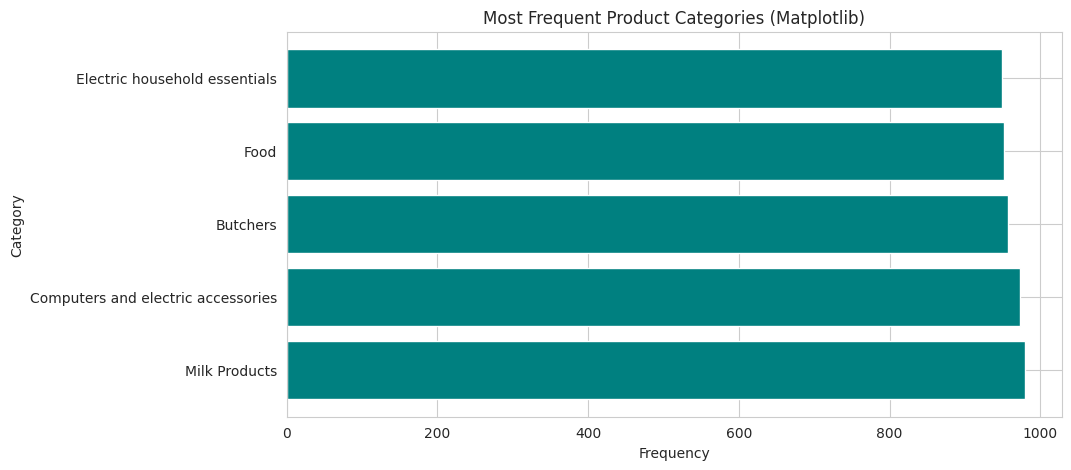

<ipython-input-1-914ba285f45e>:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Category", data=frequent_categories, palette="dark:#5A9")


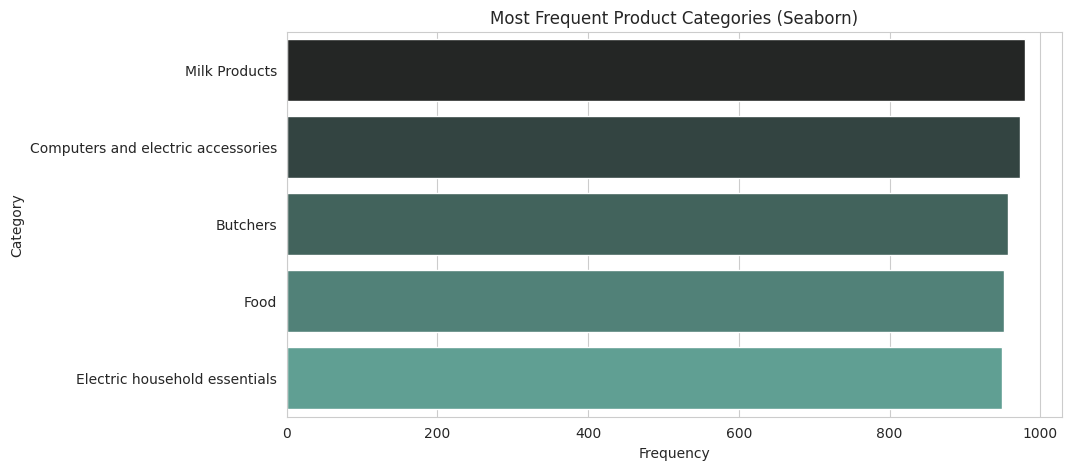

In [ ]:
!pip install pandas matplotlib seaborn
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/dataset/Final_Final_cleaned_retail_store_sales.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime format
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])

# Set Seaborn style
sns.set_style("whitegrid")

# ================== Visualization 1: Top 5 Most Frequently Purchased Items (Bar Chart) ==================

top_items = df.groupby("Item")["Quantity"].sum().reset_index().sort_values(by="Quantity", ascending=False).head(5)

# Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(top_items["Item"], top_items["Quantity"], color="blue")
plt.title("Top 5 Most Frequently Purchased Items (Matplotlib)")
plt.xlabel("Item")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x="Item", y="Quantity", data=top_items, palette="Blues_d")
plt.title("Top 5 Most Frequently Purchased Items (Seaborn)")
plt.xlabel("Item")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# ================== Visualization 2: Total Sales Per Category (Pie Chart) ==================

category_sales = df.groupby("Category")["Total Spent"].sum().reset_index()

# Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(category_sales["Total Spent"], labels=category_sales["Category"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Total Sales Per Category (Matplotlib)")
plt.show()

# Seaborn
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set2")
plt.pie(category_sales["Total Spent"], labels=category_sales["Category"], autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Total Sales Per Category (Seaborn)")
plt.show()

# ================== Visualization 3: Most Popular Payment Methods (Horizontal Bar Chart) ==================

payment_methods = df["Payment Method"].value_counts().reset_index()
payment_methods.columns = ["Payment Method", "Usage Count"]

# Matplotlib
plt.figure(figsize=(10, 5))
plt.barh(payment_methods["Payment Method"], payment_methods["Usage Count"], color="red")
plt.title("Most Popular Payment Methods (Matplotlib)")
plt.xlabel("Usage Count")
plt.ylabel("Payment Method")
plt.show()

# Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x="Usage Count", y="Payment Method", data=payment_methods, palette="coolwarm")
plt.title("Most Popular Payment Methods (Seaborn)")
plt.xlabel("Usage Count")
plt.ylabel("Payment Method")
plt.show()

# ================== Visualization 4: Monthly Sales Trend (Line Chart) ==================

df["Year"] = df["Transaction Date"].dt.year
df["Month"] = df["Transaction Date"].dt.month
monthly_sales = df.groupby(["Year", "Month"])["Total Spent"].sum().reset_index()

# Matplotlib
plt.figure(figsize=(10, 5))
for year in monthly_sales["Year"].unique():
    subset = monthly_sales[monthly_sales["Year"] == year]
    plt.plot(subset["Month"], subset["Total Spent"], marker="o", label=str(year))
plt.legend()
plt.title("Monthly Sales Trend (Matplotlib)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

# Seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Total Spent", hue="Year", data=monthly_sales, marker="o", palette="tab10")
plt.title("Monthly Sales Trend (Seaborn)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

# ================== Visualization 5: Online vs. In-Store Sales (Grouped Bar Chart) ==================

location_sales = df.groupby("Location")["Total Spent"].sum().reset_index()

# Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(location_sales["Location"], location_sales["Total Spent"], color=["green", "orange"])
plt.title("Online vs. In-Store Sales (Matplotlib)")
plt.xlabel("Location")
plt.ylabel("Total Sales")
plt.show()

# Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="Location", y="Total Spent", data=location_sales, palette="pastel")
plt.title("Online vs. In-Store Sales (Seaborn)")
plt.xlabel("Location")
plt.ylabel("Total Sales")
plt.show()

# ================== Visualization 6: Top 5 Highest-Spending Customers ==================

top_customers = df.groupby("Customer ID")["Total Spent"].sum().reset_index().sort_values(by="Total Spent", ascending=False).head(5)

# Matplotlib
plt.figure(figsize=(10, 5))
plt.bar(top_customers["Customer ID"].astype(str), top_customers["Total Spent"], color="purple")
plt.title("Top 5 Highest-Spending Customers (Matplotlib)")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()

# Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x="Customer ID", y="Total Spent", data=top_customers, palette="coolwarm")
plt.title("Top 5 Highest-Spending Customers (Seaborn)")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()

# ================== Visualization 7: Most Frequent Product Categories (Bar Chart) ==================

frequent_categories = df["Category"].value_counts().reset_index()
frequent_categories.columns = ["Category", "Frequency"]
frequent_categories = frequent_categories.head(5)

# Matplotlib
plt.figure(figsize=(10, 5))
plt.barh(frequent_categories["Category"], frequent_categories["Frequency"], color="teal")
plt.title("Most Frequent Product Categories (Matplotlib)")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

# Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Category", data=frequent_categories, palette="dark:#5A9")
plt.title("Most Frequent Product Categories (Seaborn)")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()
